# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [8]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [22]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                diferencia = Y_train[i] - prediction ## etiqueta - prediccion
                error = diferencia ** 2 ## error cuadratico medio
                train_error_acum += error # Aquí se acumula el error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights = self.weights - learning_rate * weights_derivative
                self.bias = self.bias - learning_rate * bias_derivative

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)


            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs) 

                diferencia = Y_validation[i] - prediction ## etiqueta - prediccion
                error = diferencia ** 2 ## error cuadratico medio
                val_error_acum += error # Aquí se acumula el error

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [23]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000
N_inputs = 2
train_size = 0.9
N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(2, size=(N_samples, N_inputs))
Y_train = np.logical_and(X_train[:,0], X_train[:, 1]).astype('uint8')

X_validation = np.random.randint(2, size=(N_validation, 2))
Y_validation = np.logical_and(X_validation[:,0], X_validation[:, 1]).astype('uint8')

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]]
Y_data (first 5 samples):
[0 0 1 0 0]


In [24]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [25]:
# Comprobar predicción del modelo sin entrenar
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 0.7041518651185648
Prediction: 1


In [26]:
# Obtenemos un overview de como funciona el modelo sin entrenar de forma aleatoria
predictions = []

## itera por cada muestra de validación y genera la matriz de confusion
for i in range(len(X_validation)):
    prob = perceptron_and.predict(X_validation[i])
    predictions.append((prob > th).astype('int'))

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[  0 369]
 [  0 130]]


epoch: 0 | train error: 0.038228372860247585 | val error: 0.006464102737199635
epoch: 10 | train error: 7.541717636903588e-05 | val error: 6.867054798244315e-05
epoch: 20 | train error: 1.9762061006321815e-05 | val error: 1.887803712296636e-05
epoch: 30 | train error: 8.914799376460377e-06 | val error: 8.662101936696197e-06
epoch: 40 | train error: 5.050437248291241e-06 | val error: 4.950334883221881e-06
epoch: 50 | train error: 3.2456396910718534e-06 | val error: 3.1982778181753457e-06
epoch: 60 | train error: 2.259933627012861e-06 | val error: 2.234941812867973e-06
epoch: 70 | train error: 1.6634392918258357e-06 | val error: 1.6492827580699613e-06
epoch: 80 | train error: 1.2752994509879498e-06 | val error: 1.266900440609399e-06
epoch: 90 | train error: 1.008684409367686e-06 | val error: 1.003559119652318e-06


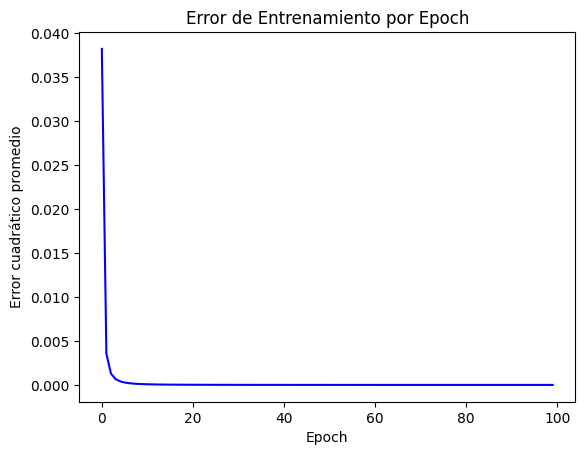

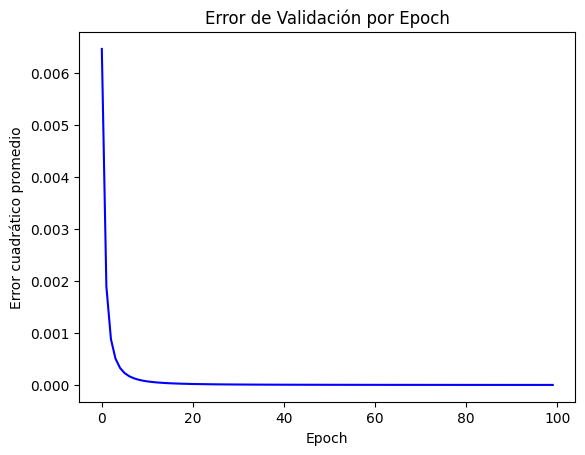

In [27]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [28]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 0]
Probabilidad: 8.96198833983175e-10
Prediction: 0


In [30]:
# Evaluamos cómo funciona el modelo en el set de validación
predictions = []
## itera por cada muestra de validación guardando las predicciones en una lista y genera la matriz de confusion
for i in range(len(X_validation)):
    prob = perceptron_and.predict(X_validation[i])
    predictions.append((prob > th).astype('int'))


# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_validation, predictions)

# Visualiza la matriz de confusión
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[369   0]
 [  0 130]]


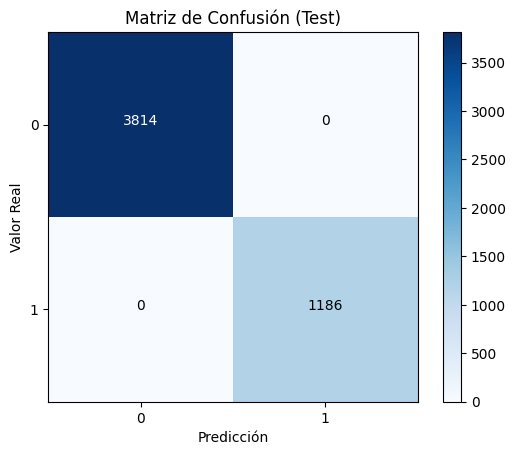

In [31]:
# Evaluamos cómo funciona el modelo en el set de test

## Generar el set de test (de forma similar al de validación)
X_test = np.random.randint(N_inputs, size=(N_samples, N_inputs))
Y_test = np.logical_and(X_test[:, 0], X_test[:, 1]).astype('uint8')


## Generar las predicciones
predictions_test = []
for i in range(X_test.shape[0]):
    inputs = X_test[i]
    prediction = perceptron_and.predict(inputs)
    predictions_test.append(round(prediction))

# Convertir las listas a arrays numpy
Y_test = np.array(Y_test)
predictions_test = np.array(predictions_test)


## Calcula la matriz de confusión
confusion_matrix_test = np.zeros((2, 2), dtype=int)
for true_label, predicted_label in zip(Y_test, predictions_test):
    confusion_matrix_test[true_label][predicted_label] += 1


## Visualiza la matriz de confusión
plt.figure()
plt.imshow(confusion_matrix_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión (Test)')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix_test[i, j]), horizontalalignment="center", color="white" if confusion_matrix_test[i, j] > confusion_matrix_test.max() / 2 else "black")
plt.show()